# **Capstone project 1 : Customer Churn**
In this code I have used Multiple Classification Model to Predict whether a Customer will Churn or Not.

In [ ]:
#Importing Required Libraries
import numpy as np
import pandas as pd
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE

#Libraries for Saving the Model
from pickle import dump
from pickle import load

#Disabling warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Importing the Dataset
df = pd.read_csv("/content/Churn_Modelling.csv")
df.head()

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CredRate         10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           9996 non-null   object 
 4   Age              9994 non-null   float64
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   Prod Number      10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   ActMem           10000 non-null  int64  
 10  EstimatedSalary  9996 non-null   float64
 11  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB


In [ ]:
df.shape

(10000, 12)

In [ ]:
df.describe()

,CustomerId,CredRate,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,9994.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,9996.000000,10000.000000
mean,1.569094e+07,650.528800,38.925255,5.012800,76485.889288,1.530200,0.70550,0.515100,100074.744083,0.203700
std,7.193619e+04,96.653299,10.489248,2.892174,62397.405202,0.581654,0.45584,0.499797,57515.774555,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,50974.077500,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100168.240000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
#Data Processing
#Checking Missing Values
df.isnull().values.any()

True

In [ ]:
df.isnull().any()

CustomerId         False
CredRate           False
Geography          False
Gender              True
Age                 True
Tenure             False
Balance            False
Prod Number        False
HasCrCard          False
ActMem             False
EstimatedSalary     True
Exited             False
dtype: bool

In [ ]:
df.isnull().sum()

CustomerId         0
CredRate           0
Geography          0
Gender             4
Age                6
Tenure             0
Balance            0
Prod Number        0
HasCrCard          0
ActMem             0
EstimatedSalary    4
Exited             0
dtype: int64

In [ ]:
#Checking Datatype of Missing Columns
df[["Gender", "Age", "EstimatedSalary"]].dtypes

Gender              object
Age                float64
EstimatedSalary    float64
dtype: object

In [ ]:
#Replcaing Missing Values with the columns mean
mean_value = df['EstimatedSalary'].mean() 
df['EstimatedSalary'] = df['EstimatedSalary'].fillna(mean_value) 

In [ ]:
#Replacing Missing Values with the Max Value of column
df['Gender'].value_counts()

Male      5453
Female    4543
Name: Gender, dtype: int64

In [ ]:
df['Gender'] = df['Gender'].fillna(df['Gender'].value_counts().idxmax()) 

In [ ]:
#Replacing Missing Values with the mode of column
df['Age'].mode()
mode_value = df['Age'].mode()
df['Age'] = df['Age'].fillna(mode_value[0])

In [ ]:
df.isnull().any()

CustomerId         False
CredRate           False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
Prod Number        False
HasCrCard          False
ActMem             False
EstimatedSalary    False
Exited             False
dtype: bool

In [ ]:
#Renaming the columns
df = df.rename(columns = {'CredRate': 'CreditScore', 'ActMem' : 'IsActiveMember',
                            'Prod Number' : 'NumOfProducts', 'Exited' : 'Churn'}) 
df.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Churn'],
      dtype='object')

In [ ]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [ ]:
#Customer Id doesn't help to predict churn so we will remove it
df.drop(labels = ['CustomerId'], axis = 1, inplace = True)

In [ ]:
column_churn = df['Churn']
df.drop(labels = ['Churn'], axis = 1, inplace = True)
df.insert(len(df.columns), 'Churn', column_churn.values)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Churn'],
      dtype='object')

In [ ]:
#Changing the Data type
df["Geography"] = df["Geography"].astype('category') 
df["Gender"] = df["Gender"].astype('category') 
df["HasCrCard"] = df["HasCrCard"].astype('category') 
df["Churn"] = df["Churn"].astype('category') 
df["IsActiveMember"] = df["IsActiveMember"].astype('category') 
df.dtypes

CreditScore           int64
Geography          category
Gender             category
Age                 float64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Churn              category
dtype: object

In [ ]:
#Performing EDA
df['Churn'].value_counts(0)

0    7963
1    2037
Name: Churn, dtype: int64

In [ ]:
df['IsActiveMember'].value_counts(0)

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [ ]:
summary_churn = df.groupby('Churn')
summary_churn.mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
Churn,,,,,,
0,651.853196,37.411277,5.033279,72745.296779,1.544267,99718.932023
1,645.351497,44.837997,4.932744,91108.539337,1.475209,101465.677531


In [ ]:
summary_churn.median()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
Churn,,,,,,
0,653.0,36.0,5.0,92072.68,2.0,99645.04
1,646.0,45.0,5.0,109349.29,1.0,102460.84


,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CreditScore,1.000000,-0.004179,0.000842,0.006268,0.012238,-0.001352
Age,-0.004179,1.000000,-0.009996,0.028141,-0.030590,-0.007215
Tenure,0.000842,-0.009996,1.000000,-0.012254,0.013444,0.007407
Balance,0.006268,0.028141,-0.012254,1.000000,-0.304180,0.013129
NumOfProducts,0.012238,-0.030590,0.013444,-0.304180,1.000000,0.014132
EstimatedSalary,-0.001352,-0.007215,0.007407,0.013129,0.014132,1.000000


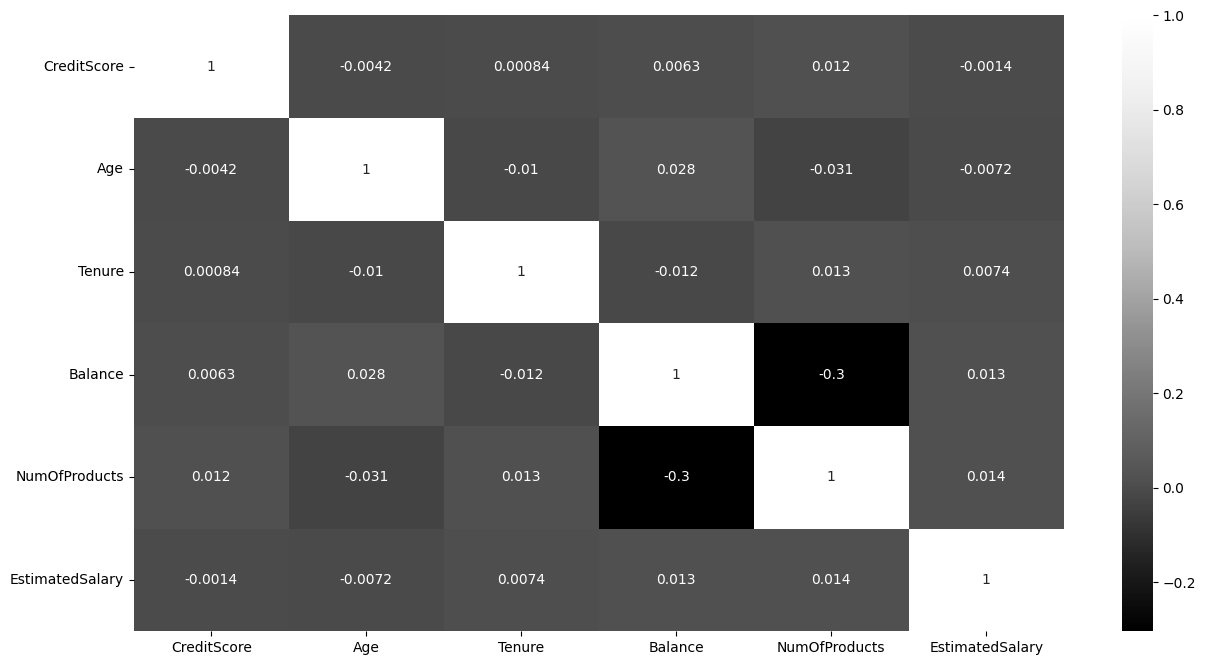

In [ ]:
#Plotting Correlation Graph
corr = df.corr() 
plt.figure(figsize=(15,8)) 
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values, annot = True, cmap = 'Greys_r') 
corr

Text(0, 0.5, 'No of Customers')

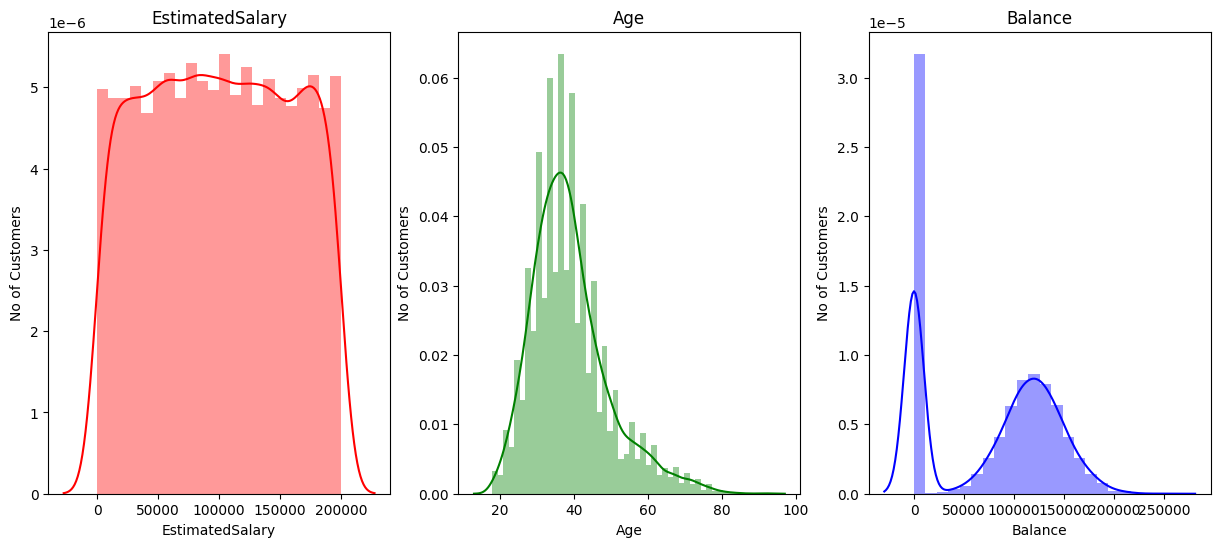

In [ ]:
#Visualizing the Data
f, axes = plt.subplots(ncols = 3, figsize = (15, 6)) 

sns.distplot(df.EstimatedSalary, kde = True, color = "Red", ax = axes[0]).set_title('EstimatedSalary') 
axes[0].set_ylabel('No of Customers') 

sns.distplot(df.Age, kde = True, color = "Green", ax = axes[1]).set_title('Age') 
axes[1].set_ylabel('No of Customers') 

sns.distplot(df.Balance, kde = True, color = "Blue", ax = axes[2]).set_title('Balance') 
axes[2].set_ylabel('No of Customers')

Text(0.5, 1.0, 'Customer Churn Distribution by Gender')

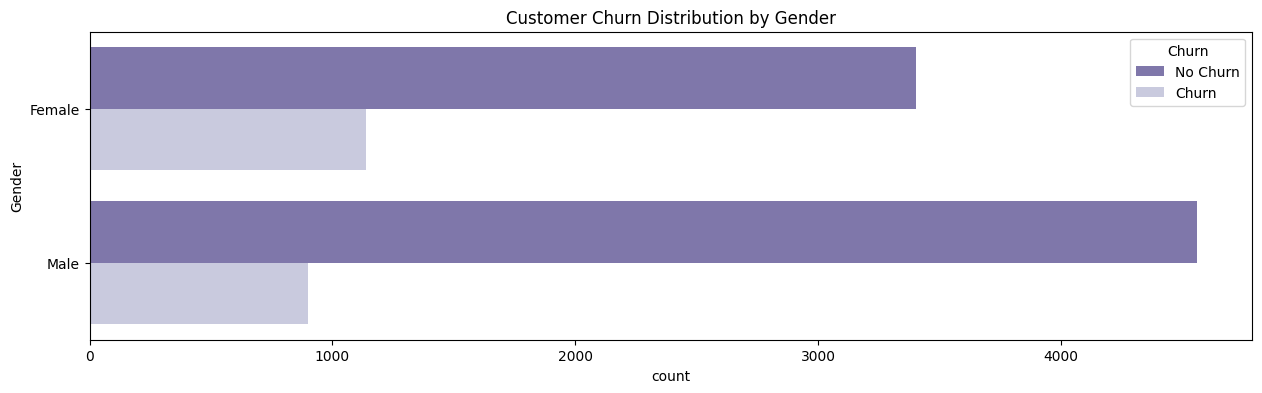

In [ ]:
plt.figure(figsize = (15, 4)) 
p = sns.countplot(y = "Gender", hue = 'Churn', data = df, palette = "Purples_r") 
legend = p.get_legend() 
legend_txt = legend.texts 
legend_txt[0].set_text("No Churn") 
legend_txt[1].set_text("Churn") 
p.set_title('Customer Churn Distribution by Gender')

Text(0.5, 1.0, 'Customer Geography Distribution')

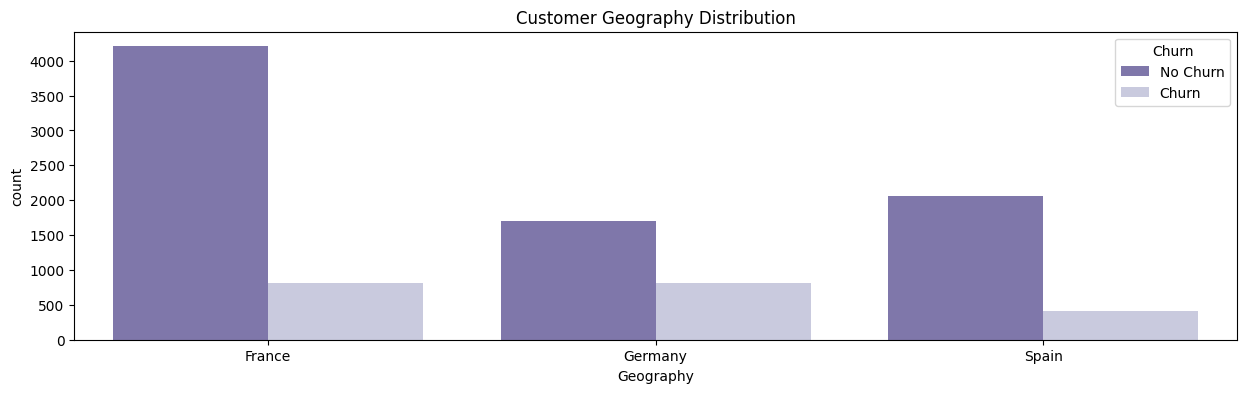

In [ ]:
plt.figure(figsize = (15, 4)) 
p = sns.countplot(x = 'Geography', hue = 'Churn', data = df, palette = "Purples_r") 
legend = p.get_legend() 
legend_txt = legend.texts 
legend_txt[0].set_text("No Churn") 
legend_txt[1].set_text("Churn") 
p.set_title('Customer Geography Distribution')

Text(0.5, 1.0, 'Customer Distribution by Product')

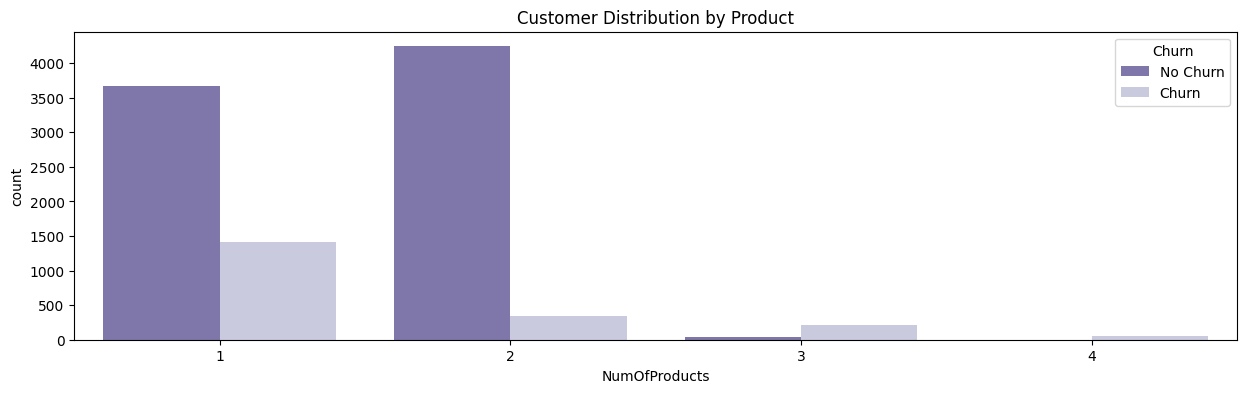

In [ ]:
plt.figure(figsize = (15, 4)) 
p = sns.countplot(x = 'NumOfProducts', hue = 'Churn', data = df, palette = "Purples_r") 
legend = p.get_legend() 
legend_txt = legend.texts 
legend_txt[0].set_text("No Churn") 
legend_txt[1].set_text("Churn") 
p.set_title('Customer Distribution by Product')

Text(0.5, 1.0, 'Customer Age - churn vs no churn')

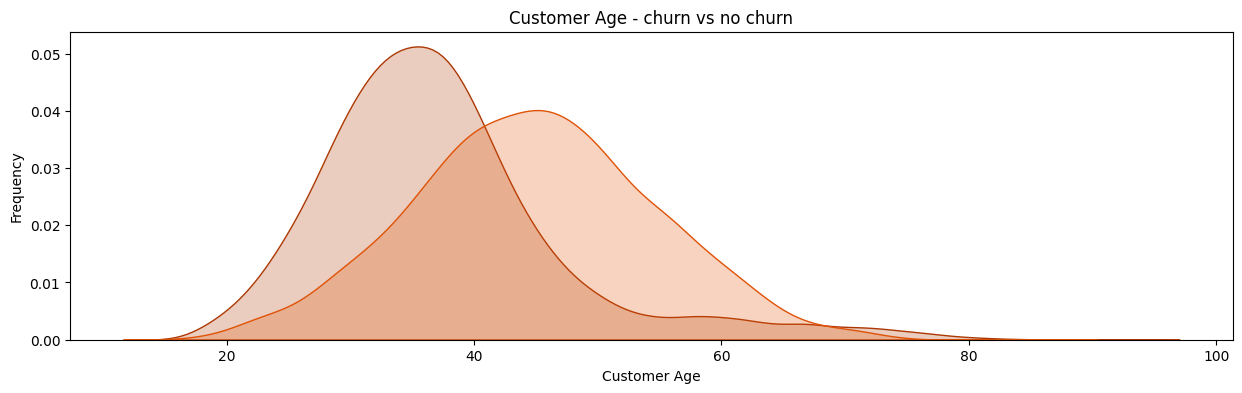

In [ ]:
plt.figure(figsize = (15, 4)) 
ax = sns.kdeplot(df.loc[(df['Churn'] == 0), 'Age'], color = sns.color_palette("Oranges_r")[0], 
                 shade = True, label = 'no churn') 
ax = sns.kdeplot(df.loc[(df['Churn'] == 1), 'Age'] , color = sns.color_palette("Oranges_r")[1],
                 shade = True, label = 'churn') 
ax.set(xlabel = 'Customer Age', ylabel = 'Frequency') 
plt.title('Customer Age - churn vs no churn') 

Text(0.5, 1.0, 'Customer Balance - churn vs no churn')

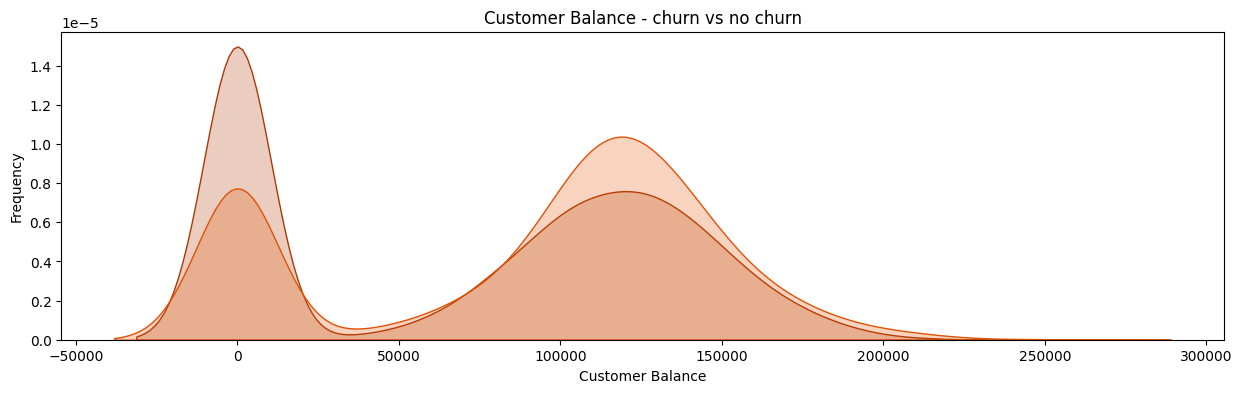

In [ ]:
plt.figure(figsize = (15, 4)) 
ax = sns.kdeplot(df.loc[(df['Churn'] == 0), 'Balance'], color = sns.color_palette("Oranges_r")[0], 
                 shade = True, label = 'no churn') 
ax = sns.kdeplot(df.loc[(df['Churn'] == 1), 'Balance'] , color = sns.color_palette("Oranges_r")[1],
                 shade = True, label = 'churn') 
ax.set(xlabel = 'Customer Balance', ylabel = 'Frequency') 
plt.title('Customer Balance - churn vs no churn') 

Text(0.5, 1.0, 'Customer Creditscore - churn vs no churn')

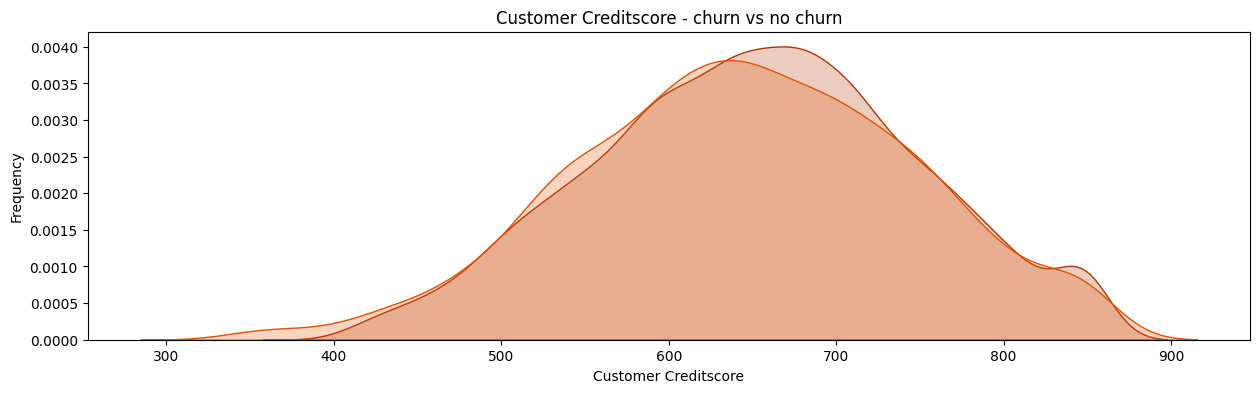

In [ ]:
plt.figure(figsize = (15, 4)) 
ax = sns.kdeplot(df.loc[(df['Churn'] == 0), 'CreditScore'], color = sns.color_palette("Oranges_r")[0], 
                 shade = True, label = 'no churn') 
ax = sns.kdeplot(df.loc[(df['Churn'] == 1), 'CreditScore'] , color = sns.color_palette("Oranges_r")[1],
                 shade = True, label = 'churn') 
ax.set(xlabel = 'Customer Creditscore', ylabel = 'Frequency') 
plt.title('Customer Creditscore - churn vs no churn') 

Text(0.5, 1.0, 'Number of Product VS Balance')

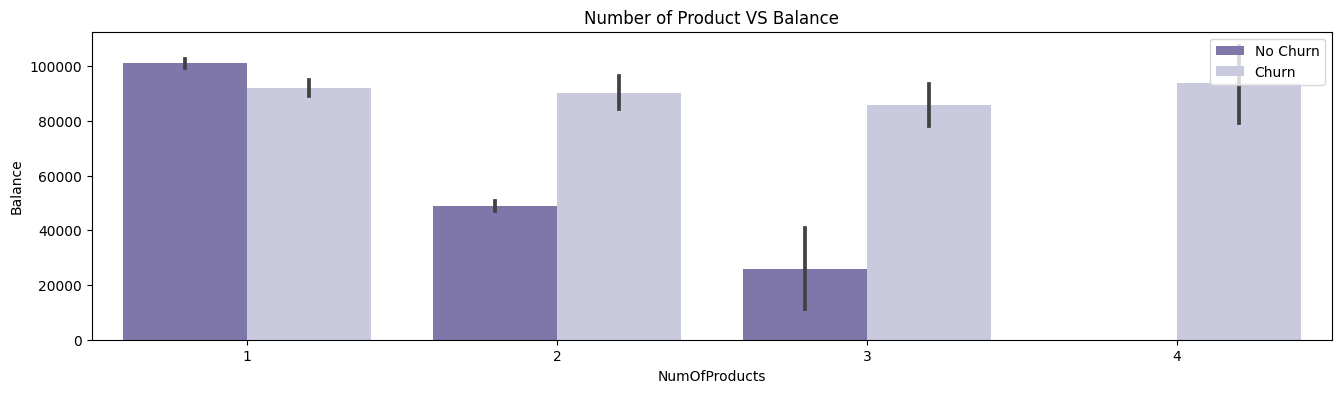

In [ ]:
plt.figure(figsize = (16, 4)) 
p=sns.barplot(x = 'NumOfProducts', y = 'Balance', hue = 'Churn', data = df, palette = "Purples_r") 
p.legend(loc = 'upper right') 
legend = p.get_legend() 
legend_txt = legend.texts 
legend_txt[0].set_text("No Churn") 
legend_txt[1].set_text("Churn") 
p.set_title('Number of Product VS Balance') 

In [ ]:
#Encoding Categorical Variables
df["Geography"] = df["Geography"].astype('category').cat.codes
df["Gender"] = df["Gender"].astype('category').cat.codes
df["HasCrCard"] = df["HasCrCard"].astype('category').cat.codes
df["Churn"] = df["Churn"].astype('category').cat.codes

In [ ]:
#Defining Dependent and Independent Variables i.e. 'Y' and 'x' resp. & splitting the data for training and testing
Y = df['Churn']
X = df.drop('Churn', axis=1)

validation_size = 0.2
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = validation_size, random_state = seed)
scoring = 'accuracy'

In [ ]:
#Applying Model
num_folds = 10
models = []
models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# Boosting methods
models.append(('GBM', GradientBoostingClassifier()))
# Bagging methods
models.append(('RF', RandomForestClassifier()))

In [ ]:
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits = num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.790000 (0.013953)
CART: 0.784750 (0.012026)
KNN: 0.757625 (0.017717)
NB: 0.783500 (0.018997)
SVM: 0.796750 (0.013465)
GBM: 0.861750 (0.012639)
RF: 0.858375 (0.011402)


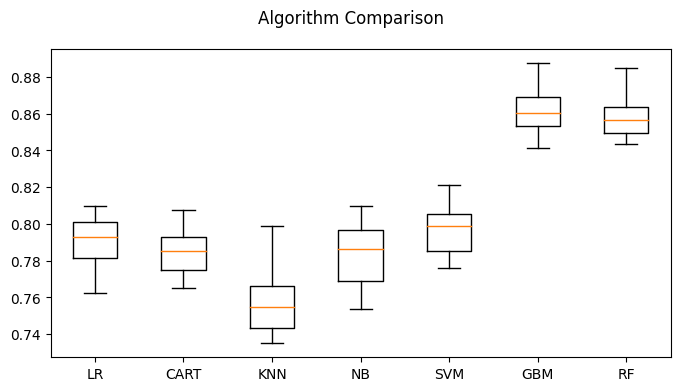

In [ ]:
#Compare algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,4)
pyplot.show()

Accuracy is high since it focuses on overall not churn case, now lets check how it predicts churn case, we choose one of the model from above, choosing RF model.

In [ ]:
#Applying Model
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
#Checking Accuracy and Rescaling)
rescaledTestX = X_test
predictions = model.predict(rescaledTestX)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.8565
[[1528   61]
 [ 226  185]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1589
           1       0.75      0.45      0.56       411

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000



<Axes: xlabel='Predicted', ylabel='Actual'>

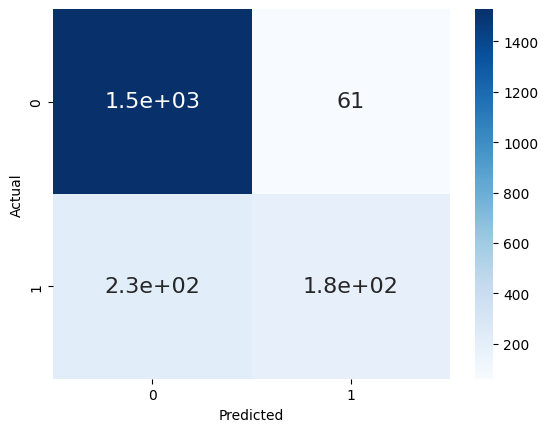

In [ ]:
#Creating Confusion Matrix
df_cm = pd.DataFrame(confusion_matrix(Y_test, predictions), columns = np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap = "Blues", annot = True, annot_kws = {"size" : 16})# font size

Results are not good as it is not predicting the actual churn, changing metrics to Precision.

In [ ]:
#Model Tuning
#Applying Model
scoring = 'precision'
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits = num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.389572 (0.056888)
CART: 0.469836 (0.034311)
KNN: 0.240966 (0.057010)
NB: 0.349572 (0.073260)
SVM: 0.000000 (0.000000)
GBM: 0.769297 (0.034407)
RF: 0.758397 (0.038964)


Since GBM has the best precision we will use it for test evaluation.

In [ ]:
#Applying Model
model = GradientBoostingClassifier()
model.fit(X_train, Y_train)

GradientBoostingClassifier()

In [ ]:
#Checking Accuracy and Rescaling)
rescaledTestX = X_test
predictions = model.predict(rescaledTestX)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.8645
[[1539   50]
 [ 221  190]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1589
           1       0.79      0.46      0.58       411

    accuracy                           0.86      2000
   macro avg       0.83      0.72      0.75      2000
weighted avg       0.86      0.86      0.85      2000



Not a big difference observed. Now lets balance the data.

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(8000, 10)
(8000,)
(2000, 10)
(2000,)


In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train == 0)))

sm = SMOTE(random_state = 2)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(Y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(Y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(Y_train_res == 0)))

Before OverSampling, counts of label '1': 1626
Before OverSampling, counts of label '0': 6374 

After OverSampling, the shape of train_X: (12748, 10)
After OverSampling, the shape of train_y: (12748,) 

After OverSampling, counts of label '1': 6374
After OverSampling, counts of label '0': 6374


In [ ]:
#Applying Model
scoring = 'accuracy'
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits = num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.790000 (0.013953)
CART: 0.783250 (0.014199)
KNN: 0.757625 (0.017717)
NB: 0.783500 (0.018997)
SVM: 0.796750 (0.013465)
GBM: 0.861625 (0.012551)
RF: 0.859625 (0.011069)


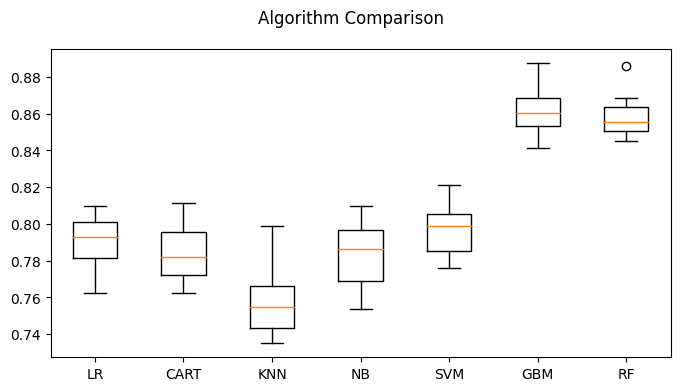

In [ ]:
#Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,4)
pyplot.show()

In [ ]:
#Tuning Hyper Parameters
n_estimators = [20, 180, 1000]
max_depth= [2, 3, 5]
param_grid = dict(n_estimators = n_estimators, max_depth = max_depth)
model = GradientBoostingClassifier()
kfold = KFold(n_splits = num_folds)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = scoring, cv = kfold)
grid_result = grid.fit(X_train_new, Y_train_new)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.778881 using {'max_depth': 2, 'n_estimators': 180}
#6 0.757585 (0.016552) with: {'max_depth': 2, 'n_estimators': 20}
#1 0.778881 (0.024562) with: {'max_depth': 2, 'n_estimators': 180}
#5 0.757862 (0.022063) with: {'max_depth': 2, 'n_estimators': 1000}
#4 0.764138 (0.017516) with: {'max_depth': 3, 'n_estimators': 20}
#3 0.767414 (0.020187) with: {'max_depth': 3, 'n_estimators': 180}
#8 0.746403 (0.023431) with: {'max_depth': 3, 'n_estimators': 1000}
#2 0.767687 (0.021297) with: {'max_depth': 5, 'n_estimators': 20}
#7 0.755400 (0.021239) with: {'max_depth': 5, 'n_estimators': 180}
#9 0.745579 (0.016632) with: {'max_depth': 5, 'n_estimators': 1000}


In [ ]:
#Applying Model
model = GradientBoostingClassifier(max_depth= 2, n_estimators = 180)
model.fit(X_train_new, Y_train_new)

GradientBoostingClassifier(max_depth=2, n_estimators=180)

In [ ]:
#Checking Accuracy
predictions = model.predict(X_test)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.821
[[1346  243]
 [ 115  296]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      1589
           1       0.55      0.72      0.62       411

    accuracy                           0.82      2000
   macro avg       0.74      0.78      0.75      2000
weighted avg       0.84      0.82      0.83      2000



After tuning the Hyperparameters, the model performed considerably much better with max accuracy of 82%.

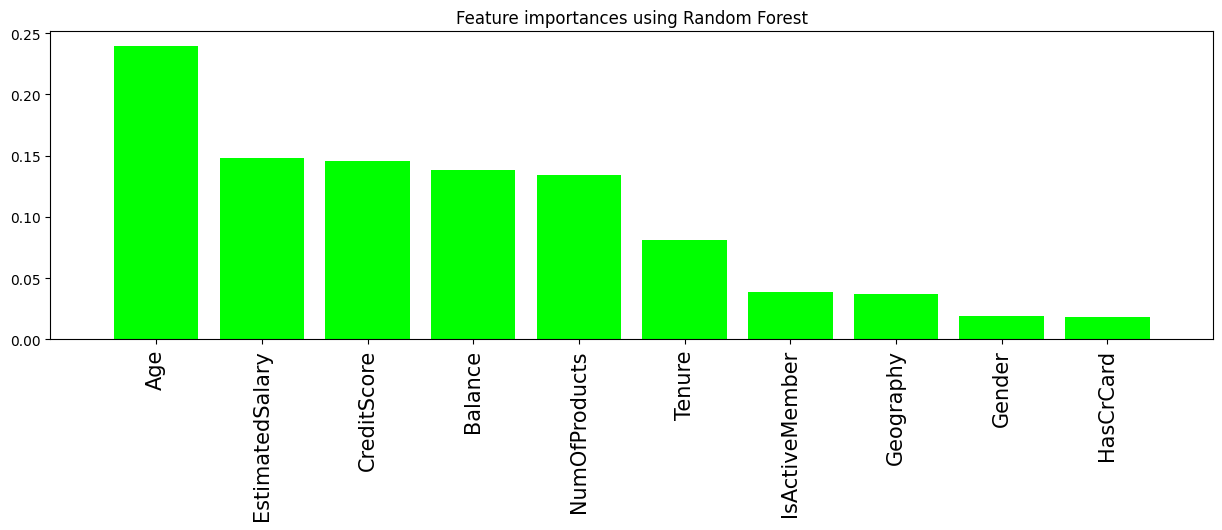

In [ ]:
#Checking Best Features
#Applying Model
forest = RandomForestClassifier(n_estimators = 500, random_state = 1)
forest.fit(X_train, Y_train)

importances = forest.feature_importances_
features = df.drop(['Churn'], axis = 1).columns

indices = np.argsort(importances)[ :: -1]

plt.figure(figsize = (15, 4)) 
plt.title("Feature importances using Random Forest") 
plt.bar(range(X_train.shape[1]), importances[indices], color = "Lime", align = "center") 
plt.xticks(range(X_train.shape[1]), features[indices], rotation = 'vertical', fontsize = 15) 
plt.xlim([-1, X_train.shape[1]])
plt.show() 

In [ ]:
feature_importance_df = pd.DataFrame({"Feature" : features, "Importance" : importances}) 
print(feature_importance_df)

           Feature  Importance
0      CreditScore    0.145899
1        Geography    0.037334
2           Gender    0.019005
3              Age    0.239444
4           Tenure    0.081026
5          Balance    0.138404
6    NumOfProducts    0.134056
7        HasCrCard    0.018527
8   IsActiveMember    0.038400
9  EstimatedSalary    0.147904
